### Plot univariate or bivariate distributions using 'kernel density estimation'(KDE).

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


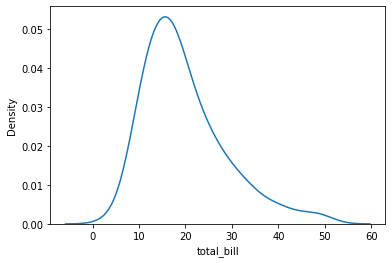

In [3]:
sns.kdeplot(data=tips, x="total_bill")
plt.show()

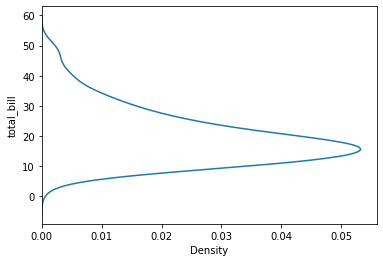

In [4]:
sns.kdeplot(data=tips, y="total_bill")
plt.show()

### Plot distributions for each column of a wide-form dataset:

In [5]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


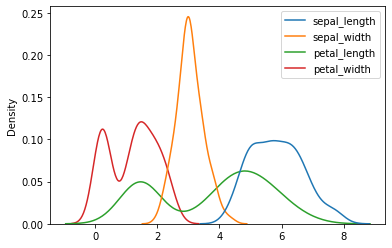

In [6]:
sns.kdeplot(data=iris)
plt.show()

### Use less smoothing:

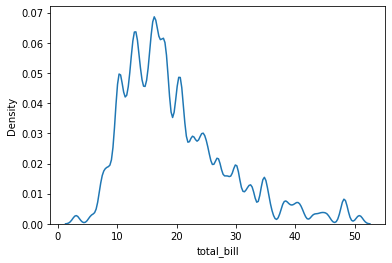

In [7]:
# if increase 'bw_adjust' value then cruve smooting increase
sns.kdeplot(data=tips,x="total_bill",bw_adjust=.2)
plt.show()

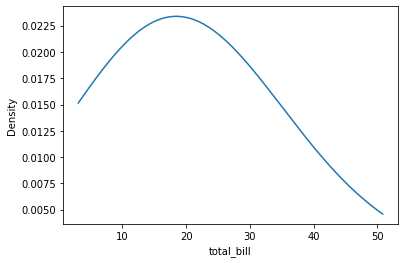

In [8]:
# Use more smoothing, but don’t smooth past the extreme data points:
sns.kdeplot(data=tips,x="total_bill",bw_adjust=5,cut=0)
plt.show()

### Plot conditional distributions with hue mapping of a second variable:

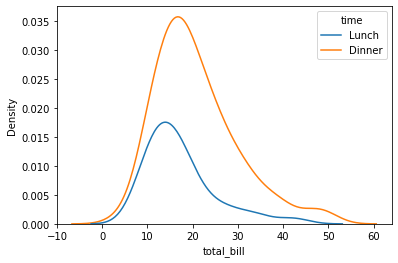

In [9]:
sns.kdeplot(data=tips, x="total_bill", hue="time")
plt.show()

### “Stack” the conditional distributions:

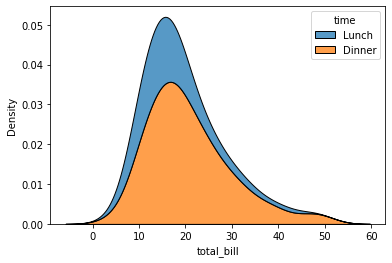

In [10]:
sns.kdeplot(data=tips, x="total_bill", hue="time",multiple="stack")
plt.show()

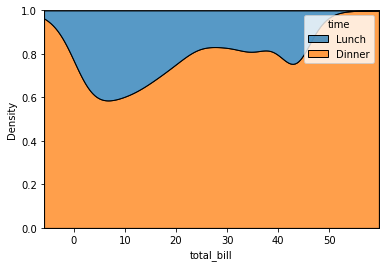

In [11]:
# Normalize the stacked distribution at each value in the grid:

sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="fill")
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

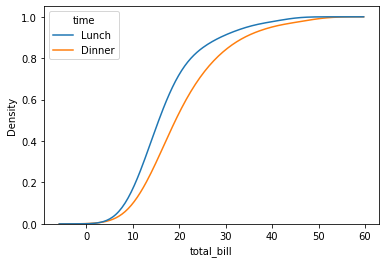

In [12]:
sns.kdeplot(
    data=tips, x="total_bill", hue="time",
    cumulative=True, common_norm=False, common_grid=True,
)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

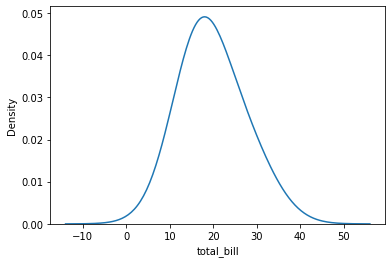

In [13]:
# Estimate distribution from aggregated data, using weights:

tips_agg = (tips
    .groupby("size")
    .agg(total_bill=("total_bill", "mean"), n=("total_bill", "count"))
)
sns.kdeplot(data=tips_agg, x="total_bill", weights="n")

In [14]:
# Map the data variable with log scaling:

# diamonds = sns.load_dataset("diamonds")
# sns.kdeplot(data=diamonds, x="price", log_scale=True)

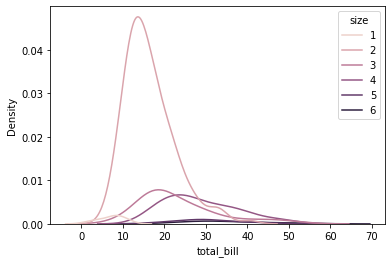

In [15]:
#Use numeric hue mapping:

sns.kdeplot(data=tips, x="total_bill", hue="size")
plt.show()

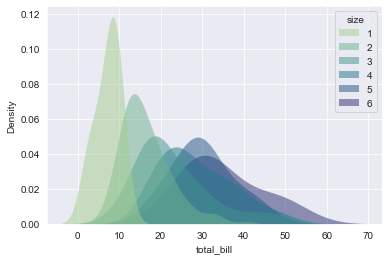

In [19]:
sns.set_style("darkgrid")
sns.kdeplot(
   data=tips, x="total_bill", hue="size",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

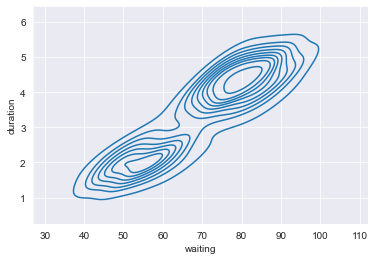

In [20]:
# Plot a bivariate distribution:

geyser = sns.load_dataset("geyser")
sns.kdeplot(data=geyser, x="waiting", y="duration")
plt.show()

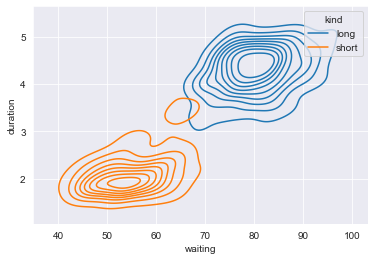

In [21]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=geyser, x="waiting", y="duration",hue="kind")
plt.show()

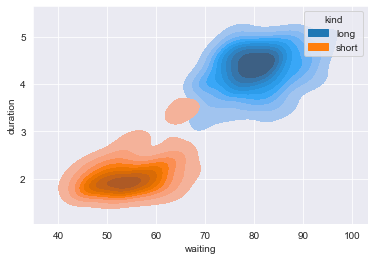

In [22]:
sns.kdeplot(data=geyser, x="waiting", y="duration",hue="kind",fill=True)
plt.show()

<AxesSubplot:xlabel='waiting', ylabel='duration'>

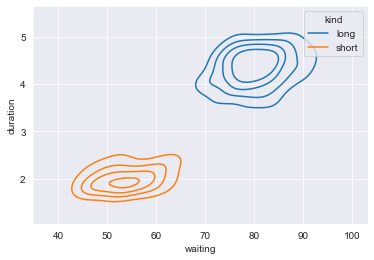

In [23]:
# Show fewer contour levels, covering less of the distribution:

sns.kdeplot(
    data=geyser, x="waiting", y="duration", hue="kind",
    levels=5, thresh=.2,
)

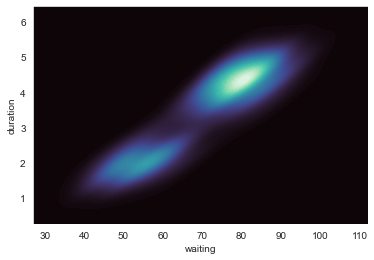

In [24]:
# Fill the axes extent with a smooth distribution, using a different colormap:

sns.kdeplot(
    data=geyser, x="waiting", y="duration",
    fill=True, thresh=0, levels=100, cmap="mako",
)
plt.show()